In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def panorama(img_right, img_left):
    img1 = cv2.cvtColor(img_right,cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img_left,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)
    good = []
    for m in matches:
        if (m[0].distance < 0.5*m[1].distance):
            good.append(m)
    matches = np.asarray(good)
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
    dst = cv2.warpPerspective(img_right,H,((img_right.shape[1] + img_left.shape[1]), img_left.shape[0]))
    dst[0:img_left.shape[0], 0:img_left.shape[1]] = img_left
    return dst

In [3]:
def crop_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image to create a binary mask
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the largest area
    max_contour = max(contours, key=cv2.contourArea)

    # Find the bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(max_contour)

    # Crop the image based on the bounding rectangle
    cropped_image = image[y:y+h, x:x+w]

    return cropped_image

[ WARN:0@10.944] global shadow_sift.hpp:13 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


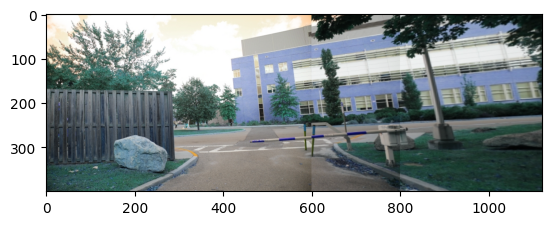

In [4]:
img_1 = cv2.imread("images/sr.jpg")
img_2 = cv2.imread("images/sm.jpg")
img_3 = cv2.imread("images/sl.jpg")

panor = panorama(img_2, img_3)
panor = panorama(img_1, panor[:, 0:800])
panor = crop_image(panor)
panor = panor[:, 0:panor.shape[1] - 60]
cv2.imwrite('output.jpg',panor)
plt.imshow(panor)
plt.show()